<a href="https://colab.research.google.com/github/Oscar19922017/HousePriceKaggle/blob/main/1_HousePriceCompetenciaDepuraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Contexto Problema**

Pídale a un comprador de vivienda que describa la casa de sus sueños, y probablemente no comenzará con la altura del techo del sótano o la proximidad a un ferrocarril de este a oeste. Pero el conjunto de datos de esta competencia en el patio de recreo demuestra que influye mucho más en las negociaciones de precios que el número de dormitorios o una valla blanca.

Con 79 variables explicativas que describen (casi) todos los aspectos de las viviendas residenciales en Ames, Iowa, esta competencia lo desafía a predecir el precio final de cada casa.

El conjunto de datos de Ames Vivienda fue compilado por Dean De Cock para su uso en la educación científica de datos. Es una alternativa increíble para los científicos de datos que buscan una versión modernizada y ampliada del conjunto de datos de Boston Housing que se cita a menudo. http://jse.amstat.org/v19n3/decock.pdf

# **2 Conocimiento de Datos**

## **Librerias**

**Configurar Entorno**

In [1]:
import os # Manipular rutas de trabajo
print(os.getcwd()) # Carpeta trabajo predeterminada por google colab
### Ruta Trabajo
Ruta_Trabajo="/content/drive/MyDrive/DATA SCIENCE/Clases2022/DataScince_Canada/ProgramacionPython/Codigo"
## Definir
os.chdir(Ruta_Trabajo)
print(os.getcwd()) # Carpeta trabajo Propia

/content
/content/drive/MyDrive/DATA SCIENCE/Clases2022/DataScince_Canada/ProgramacionPython/Codigo


In [2]:
import numpy as np # Calculos Metematicos
import pandas as pd # datos
import matplotlib.pyplot as plt # Graficos 
import seaborn as sns # Gráficos Estadisticos
## Ver mas columnas y filas de las permitidad
pd.set_option("display.max_columns",81)
## Importar propias files .py
import utils as u

## **Descripción de Archivos**

* train.csv : el conjunto de entrenamiento
* test.csv : el conjunto Activo
* data_description.txt : descripción completa de cada columna, originalmente preparada por Dean De Cock pero ligeramente editada para que coincida con los nombres de columna utilizados aquí

In [3]:
# Historia que tenemos
df_train=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/HousePriceKaggle/main/train.csv") # debe tener el precio que vale la casa
df_test=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/HousePriceKaggle/main/test.csv") # No debe tener precios

In [4]:
## Depuramos Historia
df_train.shape

(1460, 81)

In [5]:
## Test
df_test.shape

(1459, 80)

## **Diccionario de Variables**

Campos de información
Aquí hay una versión breve de lo que encontrará en el archivo de descripción de datos.

* SalePrice : el precio de venta de la propiedad en dólares. Esta es la variable objetivo que está tratando de predecir.
* MSSubClass : la clase de construcción
* MSZoning : la clasificación general de zonificación
* LotFrontage : pies lineales de calle conectados a la propiedad
* LotArea : Tamaño del lote en pies cuadrados
* Calle : Tipo de acceso por carretera
* Callejón : Tipo de acceso al callejón
* LotShape : forma general de la propiedad
* LandContour : Planitud de la propiedad
* Utilidades : tipo de utilidades disponibles
* LotConfig : configuración del lote
* LandSlope : Pendiente de la propiedad
* Vecindario : ubicaciones físicas dentro de los límites de la ciudad de Ames
* Condition1 : Proximidad a la carretera principal o al ferrocarril
* Condición 2 : Proximidad a la carretera principal o al ferrocarril (si hay un segundo)
* BldgType : Tipo de vivienda
* HouseStyle : estilo de vivienda
* OverallQual : Material general y calidad de acabado.
* OverallCond : Calificación de estado general
* Año de construcción: fecha de construcción original
* YearRemodAdd : fecha de remodelación
* RoofStyle : Tipo de techo
* RoofMatl : material del techo
* Exterior1st : Revestimiento exterior de la casa
* Exterior2nd : Revestimiento exterior de la casa (si hay más de un material)
* MasVnrType : tipo de chapa de mampostería
* MasVnrArea : Área de revestimiento de mampostería en pies cuadrados
* ExterQual : Calidad del material exterior
* ExterCond : Estado actual del material en el exterior
* Fundación : Tipo de fundación
* BsmtQual : Altura del sótano
* BsmtCond : Estado general del sótano
* BsmtExposure : Paredes de sótano a nivel de jardín o de salida
* BsmtFinType1 : Calidad del área terminada del sótano
* BsmtFinSF1 : pies cuadrados terminados tipo 1
* BsmtFinType2 : Calidad de la segunda área terminada (si está presente)
* BsmtFinSF2 : pies cuadrados con acabado tipo 2
* BsmtUnfSF : pies cuadrados sin terminar de área del sótano
* TotalBsmtSF : Total de pies cuadrados de área del sótano
* Calefacción : Tipo de calefacción
* Calefacción QC : calidad y estado de la calefacción
* CentralAir : aire acondicionado central
* Eléctrico : sistema eléctrico
* 1stFlrSF : pies cuadrados del primer piso
* 2ndFlrSF : pies cuadrados del segundo piso
* LowQualFinSF : pies cuadrados con acabado de baja calidad (todos los pisos)
* GrLivArea : pies cuadrados de área habitable sobre el nivel (suelo)
* BsmtFullBath : Baños completos en el sótano
* BsmtHalfBath : Medios baños del sótano
* FullBath : baños completos sobre rasante
* HalfBath : Medios baños sobre el nivel del suelo
* Dormitorio : número de dormitorios sobre el nivel del sótano
* Cocina : Número de cocinas
* KitchenQual : calidad de la cocina
* TotRmsAbvGrd : Total de habitaciones sobre rasante (no incluye baños)
* Funcional : clasificación de funcionalidad del hogar
* Chimeneas : Número de chimeneas
* FireplaceQu : Calidad de chimenea
* GarageType : Ubicación del garaje
* GarageYrBlt : año en que se construyó el garaje
* GarageFinish : Acabado interior del garaje
* GarageCars : Tamaño del garaje en capacidad de automóvil
* GarageArea : Tamaño del garaje en pies cuadrados
* GarageQual : Calidad de garaje
* GarageCond : Estado del garaje
* PavedDrive : entrada pavimentada
* WoodDeckSF : Área de la plataforma de madera en pies cuadrados
* OpenPorchSF : Área de porche abierto en pies cuadrados
* Porche cerrado : área de porche cerrado en pies cuadrados
* 3SsnPorch : área de porche de tres estaciones en pies cuadrados
* ScreenPorch : Área del porche de la pantalla en pies cuadrados
* PoolArea : Área de la piscina en pies cuadrados
* PoolQC : Calidad de la piscina
* Valla : calidad de la valla
* MiscFeature : característica miscelánea no cubierta en otras categorías
* MiscVal : $ Valor de la función miscelánea
* MoSold : Mes vendido
* YrSold : año vendido
* SaleType : Tipo de venta
* SaleCondition : Condición de venta

## **Extructura**

In [6]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **3) Depuración Base datos**

In [7]:
## Renombrar una Variable

In [8]:
df_train.rename(columns={"SalePrice":"Price","SaleCondition":"Condition" },inplace=True)

## **Revisar la Naturaleza de Variables**

## **Notas: Programación**

In [9]:
# condicional if

In [10]:
a=1
b=10

### **IF**

In [11]:
if (a>b):
  print("A es mayor que B")

In [12]:
str(type(df_test))

"<class 'pandas.core.frame.DataFrame'>"

In [13]:
if (str(type(df_test))=="<class 'pandas.core.frame.DataFrame'>"):
  print("Formato de la BD es Adecuada")

Formato de la BD es Adecuada


In [14]:
Edad=61
Salario=1200

### **If ELSE**

In [15]:
if ((Edad>60) and (Salario<1000) ):
  Bono=500
  SalarioPagar=Bono+Salario
else:
  Bono=0
  SalarioPagar=Bono+Salario

In [16]:
print(SalarioPagar)

1200


In [17]:
# and : cumple todas las condiciones
# or : no todas se cumple

### **ELIF**

In [18]:
Salario=5100

In [19]:
if ((Salario >=0)and (Salario <1000)):
  Bono=500
elif ((Salario >=100)and (Salario <1500)):
  Bono=300
elif (Salario >=1500)and (Salario <2000):
  Bono=150
else:
  Bono=0

In [20]:
print(Bono)

0


### **Funciones**

En Python, una definición de función tiene las siguientes características:

* La palabra clave def
* Un nombre de función
* Paréntesis ’()’, y dentro de los paréntesis los parámetros de entrada, aunque * los parámetros de entrada sean opcionales.
* Dos puntos ’:’ Algún bloque de código para ejecutar Una sentencia de retorno (opcional)

In [21]:
PromedioPrice=df_train.Price.mean()

In [22]:
df_train.Price.shape

(1460,)

In [23]:
df_train.Price[0]

208500

In [24]:
if (df_train.Price[0] > PromedioPrice ):
  OverMaean="yes"
else:
  OverMaean="not"
print(OverMaean)

yes


In [25]:
if (df_train.Price[2] > PromedioPrice ):
  OverMaean="yes"
else:
  OverMaean="not"
print(OverMaean)

yes


In [26]:
#def CalculateOverMean(Price,MeanPrice):
 # if (Price > MeanPrice ):
  #  OverMean="yes"
  #else:
   # OverMean="not"
  #return OverMean  

In [27]:
u.CalculateOverMean(Price=df_train.Price[5],MeanPrice=PromedioPrice)

'not'

In [28]:
u.CalculateOverMean(Price=df_train.Price[1000],MeanPrice=PromedioPrice)

'not'

In [29]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Condition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Bucles**

#### **For**

Bucle For

En Python, esta Estructura de Control Iterativa se caracteriza por iterar para cada uno de los elementos de una Lista (o Tupla), sin que sea necesario entonces modificar ninguna condición dentro del conjunto de instrucciones que dicho bucle contiene. Es decir, que nos mantendremos dentro del bucle siempre y cuando la Lista siga teniendo elementos.

In [30]:
## Lista
Nombres=["Oscar","Rafa","Angela","Luis","Jose","Paula"]

In [31]:
len(Nombres)

6

In [32]:
print(Nombres[0])

Oscar


In [33]:
print(Nombres[1])

Rafa


In [34]:
print(Nombres[3])

Luis


In [35]:
TipoUsuario=[]
for i in Nombres:
  Usuario=i+" " + "Estudiante"
  TipoUsuario.append(Usuario)
  print(Usuario)

Oscar Estudiante
Rafa Estudiante
Angela Estudiante
Luis Estudiante
Jose Estudiante
Paula Estudiante


In [36]:
TipoUsuario

['Oscar Estudiante',
 'Rafa Estudiante',
 'Angela Estudiante',
 'Luis Estudiante',
 'Jose Estudiante',
 'Paula Estudiante']

In [37]:
## Rango
for i in range(11):
  print(i)

0
1
2
3
4
5
6
7
8
9
10


In [38]:
for i in range(1,11):
  print(i)

1
2
3
4
5
6
7
8
9
10


In [39]:
for i in range(1,11,2):
  print(i)

1
3
5
7
9


**Iterar Dataframe**

In [40]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Condition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
OverMean=[]
for i in range(len(df_train)):
  OverMean.append(u.CalculateOverMean(Price=df_train.Price[i],MeanPrice=PromedioPrice))

In [42]:
#OverMean

In [43]:
df_train["OverMean"]=OverMean

In [44]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Condition,Price,OverMean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,yes
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,yes
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,yes
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,not
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,yes


In [45]:
df_train.OverMean.value_counts()

not    900
yes    560
Name: OverMean, dtype: int64

In [46]:
df_train.OverMean.value_counts()/len(df_train)

not    0.616438
yes    0.383562
Name: OverMean, dtype: float64

## **Mapear Tipo De Variables y Contar sus Valores Unicos y Valores Nulos**

In [47]:
Variables=df_train.columns.to_list()
print(Variables)
print(len(Variables))

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [48]:
df_train[Variables]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Condition,Price,OverMean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,yes
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,yes
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,yes
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,not
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,not
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,yes
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,yes
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,

In [49]:
## Convertirmos en Funcion
def MapeoVariables(VectorVariables,df):
  Nulos=[]
  Variable=[]
  TipoVariable=[]
  ValoresUnicos=[]
  ConteoUnicos=[]
  for i in VectorVariables:
    Variable.append(i)
    Nulos.append(df[i].isnull().sum())
    TipoVariable.append(df[i].dtype)
    ValoresUnicos.append(df[i].unique())
    ConteoUnicos.append(df[i].nunique())

  ## Tabla Resumen

  Resumen=pd.DataFrame({"Variable":Variable,"Nulos":Nulos,"TipoVariable":TipoVariable,"ValoresUnicos":ValoresUnicos,
                        "ConteoUnicos":ConteoUnicos})
  Resumen["PorcentajeNulos"]=(Resumen.Nulos/len(df))*100
  return Resumen

In [50]:
Mapeo1=MapeoVariables(VectorVariables=Variables,df=df_train)

## **ELiminar Variables con Mayor porcentajes de Nulos**

In [51]:
Mapeo1.sort_values("PorcentajeNulos",ascending=False)

,Variable,Nulos,TipoVariable,ValoresUnicos,ConteoUnicos,PorcentajeNulos
72,PoolQC,1453,object,"[nan, Ex, Fa, Gd]",3,99.520548
74,MiscFeature,1406,object,"[nan, Shed, Gar2, Othr, TenC]",4,96.301370
6,Alley,1369,object,"[nan, Grvl, Pave]",2,93.767123
73,Fence,1179,object,"[nan, MnPrv, GdWo, GdPrv, MnWw]",4,80.753425
57,FireplaceQu,690,object,"[nan, TA, Gd, Fa, Ex, Po]",5,47.260274
...,...,...,...,...,...,...
27,ExterQual,0,object,"[Gd, TA, Ex, Fa]",4,0.000000
24,Exterior2nd,0,object,"[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...",16,0.000000
23,Exterior1st,0,object,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...",15,0.000000
22,RoofMatl,0,object,"[CompShg, WdShngl, Metal, WdShake, Membran, Ta...",8,0.000000


*  Eliminarmos variables con nulos mayor al 80%

In [52]:
Eliminar=Mapeo1.Variable[Mapeo1.PorcentajeNulos >=80].to_list()
Eliminar

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [53]:
Variable= df_train.columns.to_list()

In [54]:
len(Variable)

82

In [55]:
VariablesKeep=[]

for i in range(len(Variables)):
  if (Variable[i] in Eliminar) ==False:
    VariablesKeep.append(Variable[i])


In [56]:
len(VariablesKeep)

78

In [57]:
df_train=df_train[VariablesKeep]

In [58]:
Mapeo2=MapeoVariables(VectorVariables=VariablesKeep,df=df_train)

## **Variables con un Solo Valor**

In [59]:
Mapeo2.sort_values("ConteoUnicos",ascending=True)

,Variable,Nulos,TipoVariable,ValoresUnicos,ConteoUnicos,PorcentajeNulos
77,OverMean,0,object,"[yes, not]",2,0.0
5,Street,0,object,"[Pave, Grvl]",2,0.0
40,CentralAir,0,object,"[Y, N]",2,0.0
8,Utilities,0,object,"[AllPub, NoSeWa]",2,0.0
64,PavedDrive,0,object,"[Y, N, P]",3,0.0
...,...,...,...,...,...,...
42,1stFlrSF,0,int64,"[856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...",753,0.0
36,BsmtUnfSF,0,int64,"[150, 284, 434, 540, 490, 64, 317, 216, 952, 1...",780,0.0
45,GrLivArea,0,int64,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...",861,0.0
4,LotArea,0,int64,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",1073,0.0


### **Proporcion**

In [60]:
VariablesDosValores=Mapeo2.Variable[Mapeo2.ConteoUnicos	<=2].to_list()

In [61]:
for i in VariablesDosValores:
  print(df_train[i].value_counts())
  print(df_train[i].value_counts()/len(df_train))

Pave    1454
Grvl       6
Name: Street, dtype: int64
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
Y    1365
N      95
Name: CentralAir, dtype: int64
Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64
not    900
yes    560
Name: OverMean, dtype: int64
not    0.616438
yes    0.383562
Name: OverMean, dtype: float64


In [62]:
df_train.drop(columns=["Street","Utilities"],inplace=True)

In [63]:
Variables=df_train.columns.to_list()

## **Por Tipo de Variable**

In [64]:
VariablesNumericas=df_train._get_numeric_data().columns.to_list()
MapeoNum=MapeoVariables(VectorVariables=VariablesNumericas,df=df_train)

* MSSubClass: Identifies the type of dwelling involved in the sale.

In [65]:
VariablesDeberianCategoricas=["MSSubClass","OverallQual","OverallCond","YrSold","MoSold","HalfBath","BsmtHalfBath","FullBath","Fireplaces","KitchenAbvGr","BsmtFullBath",
                              "GarageCars"]
VariablesDeberianString=["Id"]

In [66]:
MapeoNum

,Variable,Nulos,TipoVariable,ValoresUnicos,ConteoUnicos,PorcentajeNulos
0,Id,0,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1460,0.000000
1,MSSubClass,0,int64,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15,0.000000
2,LotFrontage,259,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110,17.739726
3,LotArea,0,int64,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",1073,0.000000
4,OverallQual,0,int64,"[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]",10,0.000000
5,OverallCond,0,int64,"[5, 8, 6, 7, 4, 2, 3, 9, 1]",9,0.000000
6,YearBuilt,0,int64,"[2003, 1976, 2001, 1915, 2000, 1993, 2004, 197...",112,0.000000
7,YearRemodAdd,0,int64,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...",61,0.000000
8,MasVnrArea,8,float64,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",327,0.547945
9,BsmtFinSF1,0,int64,"[706, 978, 486, 216, 655, 732, 1369, 859, 0, 8...",637,0.000000


In [67]:
df_train[VariablesDeberianCategoricas]=df_train[VariablesDeberianCategoricas].astype("category")

In [68]:
df_train[VariablesDeberianString]=df_train[VariablesDeberianString].astype(str)

In [69]:
VariablesNumericas1=df_train._get_numeric_data().columns.to_list()
MapeoNum1=MapeoVariables(VectorVariables=VariablesNumericas1,df=df_train)
MapeoNum1.sort_values("ConteoUnicos",ascending=True)

,Variable,Nulos,TipoVariable,ValoresUnicos,ConteoUnicos,PorcentajeNulos
22,PoolArea,0,int64,"[0, 512, 648, 576, 555, 480, 519, 738]",8,0.000000
13,BedroomAbvGr,0,int64,"[3, 4, 1, 2, 0, 5, 6, 8]",8,0.000000
14,TotRmsAbvGrd,0,int64,"[8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]",12,0.000000
20,3SsnPorch,0,int64,"[0, 320, 407, 130, 180, 168, 140, 508, 238, 24...",20,0.000000
23,MiscVal,0,int64,"[0, 700, 350, 500, 400, 480, 450, 15500, 1200,...",21,0.000000
11,LowQualFinSF,0,int64,"[0, 360, 513, 234, 528, 572, 144, 392, 371, 39...",24,0.000000
3,YearRemodAdd,0,int64,"[2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...",61,0.000000
21,ScreenPorch,0,int64,"[0, 176, 198, 291, 252, 99, 184, 168, 130, 142...",76,0.000000
15,GarageYrBlt,81,float64,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",97,5.547945
0,LotFrontage,259,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110,17.739726


**Variables Tipo String**

In [70]:
VariableTexto=df_train.drop(columns=["Id"]).select_dtypes(include=["object"]).columns.to_list()

In [71]:
Mapeostr=MapeoVariables(VectorVariables=VariableTexto,df=df_train)
Mapeostr.sort_values("ConteoUnicos",ascending=True)

,Variable,Nulos,TipoVariable,ValoresUnicos,ConteoUnicos,PorcentajeNulos
37,OverMean,0,object,"[yes, not]",2,0.000000
25,CentralAir,0,object,"[Y, N]",2,0.000000
34,PavedDrive,0,object,"[Y, N, P]",3,0.000000
31,GarageFinish,81,object,"[RFn, Unf, Fin, nan]",3,5.547945
4,LandSlope,0,object,"[Gtl, Mod, Sev]",3,0.000000
27,KitchenQual,0,object,"[Gd, TA, Ex, Fa]",4,0.000000
20,BsmtExposure,38,object,"[No, Gd, Mn, Av, nan]",4,2.602740
19,BsmtCond,37,object,"[TA, Gd, nan, Fa, Po]",4,2.534247
15,ExterQual,0,object,"[Gd, TA, Ex, Fa]",4,0.000000
14,MasVnrType,8,object,"[BrkFace, None, Stone, BrkCmn, nan]",4,0.547945


In [72]:
df_train[VariableTexto]=df_train[VariableTexto].astype("category")

In [73]:
df_train[VariableTexto]

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,Condition,OverMean
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,yes
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,yes
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,yes
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,not
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,not
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal,yes
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,yes
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal,not


**Finalmente el conteo**

In [74]:
VariableTexto=df_train.select_dtypes(include=["object"]).columns.to_list()
VariableTexto

['Id']

In [75]:
VariablesNumericas=df_train._get_numeric_data().columns.to_list()
print(len(VariablesNumericas))
print(VariablesNumericas)

25
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Price']


In [76]:
VariablesCategoricas=df_train.select_dtypes(include=["category"]).columns.to_list()
print(len(VariablesCategoricas))
print(VariablesCategoricas)

50
['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'Condition', 'OverMean']


## **Tratamiento Valores Nulos**

In [77]:
Variables=df_train.columns.to_list()

In [78]:
MapeoFinal=MapeoVariables(VectorVariables=Variables,df=df_train)
MapeoFinal.sort_values("PorcentajeNulos",ascending=False).head(20)

,Variable,Nulos,TipoVariable,ValoresUnicos,ConteoUnicos,PorcentajeNulos
54,FireplaceQu,690,category,"[NaN, 'TA', 'Gd', 'Fa', 'Ex', 'Po'] Categories...",5,47.260274
3,LotFrontage,259,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110,17.739726
56,GarageYrBlt,81,float64,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",97,5.547945
57,GarageFinish,81,category,"['RFn', 'Unf', 'Fin', NaN] Categories (3, obje...",3,5.547945
60,GarageQual,81,category,"['TA', 'Fa', 'Gd', NaN, 'Ex', 'Po'] Categories...",5,5.547945
61,GarageCond,81,category,"['TA', 'Fa', NaN, 'Gd', 'Po', 'Ex'] Categories...",5,5.547945
55,GarageType,81,category,"['Attchd', 'Detchd', 'BuiltIn', 'CarPort', NaN...",6,5.547945
29,BsmtExposure,38,category,"['No', 'Gd', 'Mn', 'Av', NaN] Categories (4, o...",4,2.602740
32,BsmtFinType2,38,category,"['Unf', 'BLQ', NaN, 'ALQ', 'Rec', 'LwQ', 'GLQ'...",6,2.602740
30,BsmtFinType1,37,category,"['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', NaN, 'LwQ'...",6,2.534247


In [79]:
## Variables con Datos Nulos
VariablesImputar=MapeoFinal.Variable[(MapeoFinal.Nulos>0)].to_list()

In [80]:
import scipy.stats as sp
sp.skew(df_train.LotFrontage.dropna())

2.160865994705543

* asimetría=0: Distribución simétrica
* asimetría>0: Distribución asimétrica a la derecha
* asimetría<0: Distribución asimétrica a la izquierda

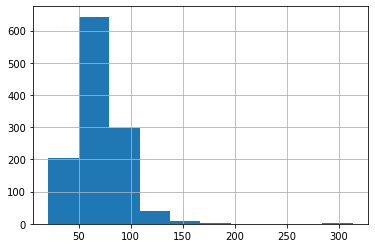

In [81]:
df_train.LotFrontage.hist();

In [82]:
df_train.MasVnrType.isnull().sum()

8

In [83]:
## Programación Funcional
# Codigo Spaguetis: Mala Practica
# Programaerse con el paradirgma POO + coneptos profesional

In [89]:
def Impute(df,var):
  df_train=df
  VariablesImputar=var

  import scipy.stats as sp
  for i in VariablesImputar:
    ## Que Tipo de Variables es
    if (df_train[i].dtype == "category"):
      ##Calcular la Moda
      Moda=sp.mode(df_train[i])[0][0]
      ## Reemplazar por Datos Nulos por Moda
      df_train[i]=df_train[i].astype(str)
      df_train[i]=df_train[i].replace(np.nan,Moda)
      df_train[i]=df_train[i].astype("category")
    elif (df_train[i].dtype == "int64" or df_train[i].dtype == "float64" ):
      ## Cual de los metodos, para ellos, vemos la simetria
      if (sp.skew(df_train[i].dropna())==0):
        promedio=df_train[i].mean()
        df_train[i]=df_train[i].replace(np.nan,promedio)
      else:
        mediana=df_train[i].median()
        df_train[i]=df_train[i].replace(np.nan,mediana)
    pass
  return df_train

In [91]:
df_train=Impute(df=df_train,var=VariablesImputar)

In [93]:
df_train[VariablesImputar].isnull().sum()

LotFrontage     0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [96]:
df_train.drop(columns=["OverMean"],inplace=True)

In [98]:
df_train.shape

(1460, 75)

In [99]:
VariablesNumericas=df_train._get_numeric_data().columns.to_list()
print(len(VariablesNumericas))
print(VariablesNumericas)

25
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Price']


In [100]:
VariablesCategoricas=df_train.select_dtypes(include=["category"]).columns.to_list()
print(len(VariablesCategoricas))
print(VariablesCategoricas)

49
['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'Condition']


# **Exportar Base de Datos**

In [102]:
df_train.to_excel("Train_HousePrice_Dep.xlsx",index=False)